## Linear Regression


#### Programming Exercise 1: Linear Regression - Machine Learning

In [218]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

##Univariate Linear Regression

### The Dataset

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profitt indicates a loss.

In [219]:
data = np.genfromtxt('ex1data1.txt', delimiter=',')

X = data[:,0] # dataset features
y = data[:,1] # dataset labels

print(min(X), max(X))
print(min(y), max(y))

5.0269 22.203
-2.6807 24.147


In [220]:
print(data.shape)

(97, 2)


###Plotting the data

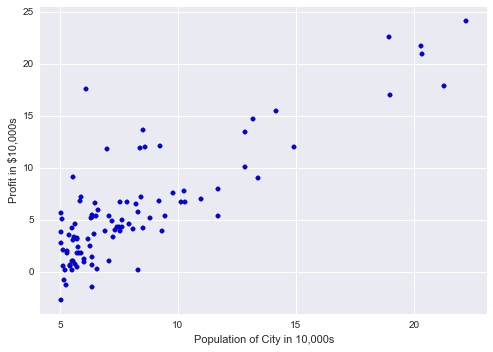

In [221]:
x_label = "Population of City in 10,000s"
y_label = "Profit in $10,000s"

ax = plt.axes()
ax.scatter(X, y);
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.axis('tight');

### Initializing the parameters

We start off by initializing the initial parameters

In [222]:
X = np.c_[np.ones(len(X)), X] # add a column of 1 to X
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

### Cost function J($\theta$) = $\sum_{n=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2$
Where the hypothesis $h_{\theta}$ is given by the linear model $h_{\theta}(x) = \theta^T x$ = $\theta_{0} + \theta_{1}$

The following piece of code implements the cost function J($\theta$)

In [223]:
def computeCost(X, y, theta):
    return np.sum(np.dot(X, theta) - y **2) / (2 * len(X))

In [224]:
computeCost(X,y,theta)

-32.072733877455676

### Gradient descent 

In batch gradient descent each iteration performs the update $\theta_{j} := \theta_{j} - \alpha \sum_{n=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^(i)$

In [225]:
def gradientDescent(X, y, theta, alpha, num_iterations):
    m = len(X)
    X_trans = np.transpose(X)
    J_history = []
    for i in range(num_iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X_trans, loss) / m
        theta = theta - alpha * gradient
        J_history.append(cost)
    return theta, J_history

In [226]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations);

### Visualizing J($\theta$)

The following plots visualizes the evolution of the cost function J($\theta$) over all iterations.

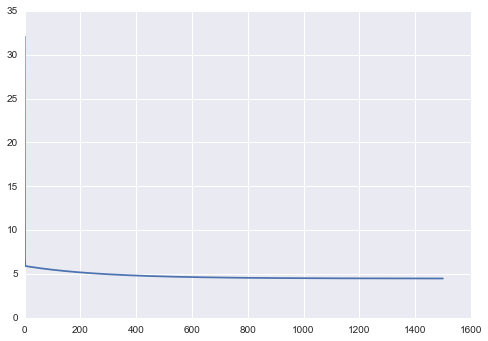

In [227]:
plt.plot(range(0, iterations), J_history);

### Plotting the regression line



(4.1631359782757063,
 23.066764021724293,
 -4.0292981225080631,
 25.49559812250806)

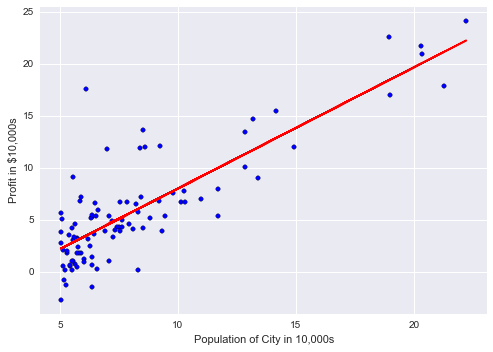

In [228]:
predict = np.dot(X, theta); # predict for all X values

ax = plt.axes()
ax.scatter(X[:,1], y)
ax.plot(X[:,1], predict, color='r');
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.axis('tight')

## Linear Regression with multiple variables

### The dataset

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [233]:
data = np.genfromtxt('ex1data2.txt', delimiter=',')

X = data[:,[0,1]] # dataset features
y = data[:, 2] # dataset labels

print(min(X[:,0]), max(X[:,0]))
print(min(X[:,1]), max(X[:,1]))
print(min(y), max(y))

852.0 4478.0
1.0 5.0
169900.0 699900.0


In [230]:
print(data.shape)

(47, 3)


Matplotlib was designed to be a two-dimensional plotting library. Around the time of the 1.0 release, some 3D plotting utilities were built on top of matplotlib’s 2D display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. 3D plots are enabled by importing the mplot3d submodule

IndexError: index 2 is out of bounds for axis 1 with size 2

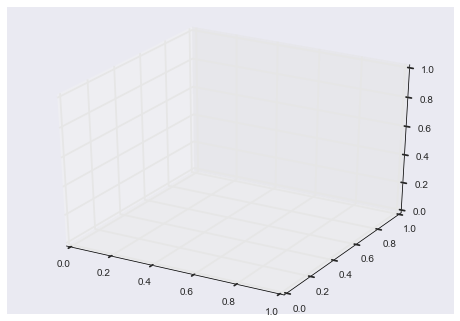

In [235]:
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
zline = X[:,0]
xline = X[:,1]
yline = X[:,2]
ax.plot3D(xline, yline, zline, 'gray')

The maximum value of size if almost 1000 times as large as the maximum value of number of bedrooms feature scaling can make gradient descent converge more quickly.

In [211]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X) 

When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations.

In [212]:
print(scaler.mean_)
print(scaler.std_)

[  9.44870659e-18  -1.00392508e-17]
[ 1.  1.]


In [214]:
def gradientDescent(X, y, theta, alpha, num_iterations):
    m = len(X)
    X_trans = np.transpose(X)
    J_history = []
    for i in range(num_iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X_trans, loss) / m
        theta = theta - alpha * gradient
        J_history.append(cost)
    return theta, J_history

In [216]:
theta, J_history = gradientDescent(X_scaled, y, theta, alpha, iterations);